In this week you'll learn
# Multi-class Categorization.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [8]:
training_path = 'F:/basic_python/Coursera/dataset/Rock_paper_scissor/rps_trainset/'
validation_path = 'F:/basic_python/Coursera/dataset/Rock_paper_scissor/rps-test-set/'

training_datagen = image.ImageDataGenerator(rescale = 1./255., #scaling the images. 
                                           rotation_range = 30, # rotating the image
                                           width_shift_range = 0.2, # shifting the width of the image.  
                                           height_shift_range = 0.2, # shifting the height of the imag e
                                           shear_range = 0.2, # compressing the image. 
                                           zoom_range = 0.2, # zooming in the image by 20 percent image.
                                           horizontal_flip = True, # flipping the image.
                                           fill_mode = 'nearest') # if the pixel is empty, take the nearest pixel value.

validation_datagen = image.ImageDataGenerator(rescale=1./255.) 

train_generator = training_datagen.flow_from_directory(training_path, # file path
                                                      target_size=(170, 170), # desired image size.
                                                      class_mode = 'categorical', # classifying as categorical
                                                      batch_size=20) # batch size of the size.
validation_generator = validation_datagen.flow_from_directory(validation_path, # file path
                                                             target_size=(170, 170), # desired image size
                                                             class_mode = 'categorical',
                                                             batch_size=10)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [26]:
# creating the model.
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(170, 170, 3)),
    
    MaxPooling2D(2,2),
    
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
    
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dropout(0.4),
    
    Dense(512, activation = 'relu'),
    Dense(3, activation='softmax') # since our data have rock, paper,
                                # and scissor
    
])

# compiling the model.

model.compile(
             loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = 'rmsprop',
             metrics=['accuracy'])

When you are using generator you have to  specify "steps_per_epoch" (for validation data use validation_steps). what it does(see below cell) it should cover 8 times the batch_size (per epoch should cover the batch_size of 126 for about 8 times(for training) and same intution applies for about 4 times (for validation)).

In [27]:
history = model.fit(train_generator, epochs = 50,
                    steps_per_epoch=7,
                   validation_data= validation_generator,
                   verbose=1, # i want the progress.
                   validation_steps=4)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 4 steps
Epoch 1/50
7/7 [==============================] - 58s 8s/step - loss: 8.2458 - accuracy: 0.3143 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 2/50
7/7 [==============================] - 62s 9s/step - loss: 1.1018 - accuracy: 0.3714 - val_loss: 1.0972 - val_accuracy: 0.3750
Epoch 3/50
7/7 [==============================] - 79s 11s/step - loss: 1.0980 - accuracy: 0.3786 - val_loss: 1.0972 - val_accuracy: 0.3750
Epoch 4/50
7/7 [==============================] - 54s 8s/step - loss: 1.0935 - accuracy: 0.3643 - val_loss: 1.0967 - val_accuracy: 0.3750
Epoch 5/50
7/7 [==============================] - 73s 10s/step - loss: 1.2058 - accuracy: 0.3643 - val_loss: 1.0976 - val_accuracy: 0.3750
Epoch 6/50
7/7 [==============================] - 80s 11s/step - loss: 1.1664 - accuracy: 0.3071 - val_loss: 1.0982 - val_accuracy: 0.3750
Epoch 7/50
7/7 [==============================] - 103s 15s/step - loss: 1.1052 

model.save(). It saves the Architecture and weights of the model in h5 format.

In [28]:
model.save('rps.h5')

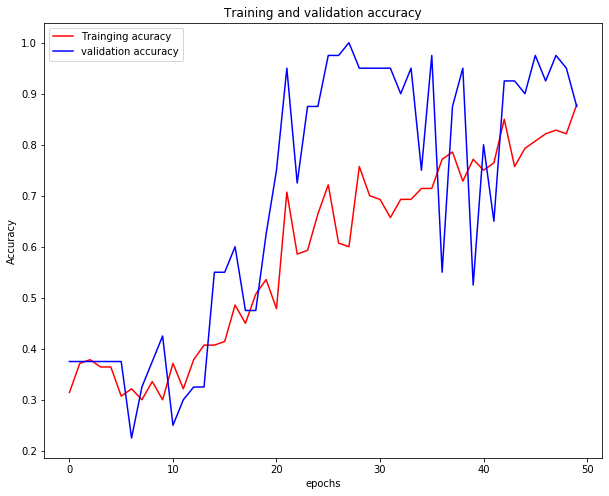

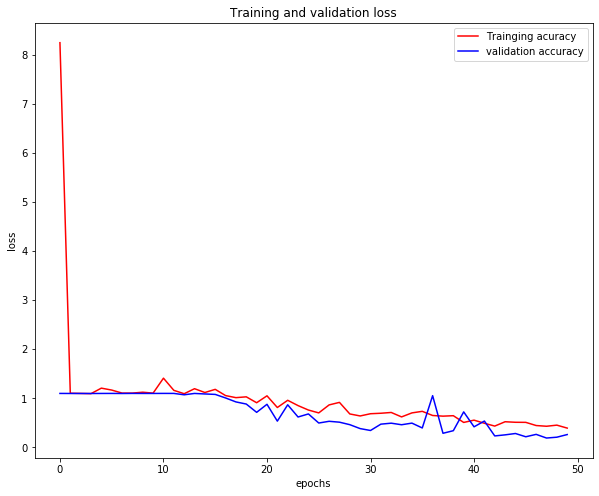

In [50]:
# plotting the graph.
acc = history.history['accuracy'] # getting the accuracy
val_acc = history.history['val_accuracy'] # getting the val_accuracy
loss = history.history['loss'] # getting the loss
val_loss = history.history['val_loss'] # getting the val_loss.

epochs = range(len(acc)) # length of the acc will be the no of epochs.

plt.figure(figsize=(10,8)) # adjusting the figure size.
plt.plot(epochs, acc, 'r', label = "Trainging acuracy") #  getting the data for x-axis and for y-axis.(for training).
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy') # getting the data for x-axis and y-axis(for validation).
plt.title('Training and validation accuracy') # return the title.
plt.xlabel('epochs') # naming the x-axis
plt.ylabel('Accuracy') # naming the y-axis
plt.legend(loc=0) # to visualize the labels
plt.show() # show the figure.

plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'r', label = "Trainging acuracy")
plt.plot(epochs, val_loss, 'b', label = 'validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()


Importing a random image for prediction.

In [51]:
# random_image_path = 'F:/basic_python/Coursera/dataset/paper_img.jpg'
# random_image_path = 'F:/basic_python/Coursera/dataset/scissor.jpg'
random_image_path = 'F:/basic_python/Coursera/dataset/rock.jpg'
# load_img will import the image with desired target size.
img = image.load_img(random_image_path, target_size=(170, 170))


import numpy as np
x = image.img_to_array(img) # converting the image to array.
x = np.expand_dims(x, axis=0) # expanding dimensions.

classes = model.predict(x) # prediction.
print(classes) # printing the classes.

[[0. 1. 0.]]


[paper, rock, scissor]